In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Modelo de segmentación de test and train
from sklearn.linear_model import Lasso #Modelo implementado para hacer la predicción del ingreso de las peliculas

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
X = pd.read_csv(r'C:\Scripts\Proyectos\Predicción_de_ingresos_peliculas\Data\X_opening.csv')

In [18]:
y = X['worldwide_gross'] #Se saca en una variable a parte los valores de la variable objetivo

In [20]:
X = X.drop('worldwide_gross',axis=1) #Se elimina del df de entrada la variable a predecir

## Separación de datos de entrenamiento y prueba

Para este caso puntual se utilizara una distribución del 60% para los datos de entrenamiento y un 40% para los de prueba.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [23]:
#Se realiza una validación de la distribución de los datos posterior a la segmentación.     
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


## Aplicación del primer modelo de ML 

En este caso particular se usa Lasso debido a que la cantidad de datos es menor a 100k y algunas de las variables tienen una significancia importante en el modelo.

In [25]:
#Se instancia inicialmente el modelo

model = Lasso()

In [26]:
#Se realiza el entrenamiento inicial del modelo

model.fit(X_train,y_train)

C:\Users\WIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.369409934272328e+17, tolerance: 7404171879106711.0
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [34]:
#posteriormente se realiza una predicción sobre los datos de prueba

predicted = model.predict(X_test)

Se realiza una validación inicial de la predicción por medio de un histograma y como se puede observar se estan presentando valores equiparables entre los y de prueba y los de predecidos por el modelo.

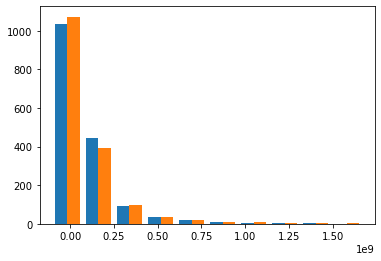

In [37]:
plt.hist([predicted,y_test]); 

## Estimación del score

In [38]:
model.score(X_test,y_test) # Se realiza la primera estimación sobre los datos de prueba, se debe tener en cuenta que hasta momento el modelo nunca ha visto los datos de prueba por lo cual es una primera buena estimación.

0.7209750708232816

De la mano del Score se establece el comportamiento de los residuales con el fin de evaluar que efecto sobre el modelo pueden llegar a tener. (resido = diferencia entre la predicción y el valor real.)

In [39]:
residuals = y_test - predicted

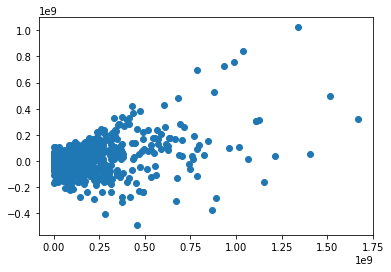

In [40]:
plt.scatter(y_test,residuals)

#Se obtiene inicialmente que no hay patrones a simple vista, sin embargo hay bastantes valores alejados al cero por lo cual se debe tratar de disminuir estos.

# Se debe tener en cuenta que estos son errores absolutos no en porcentajes.

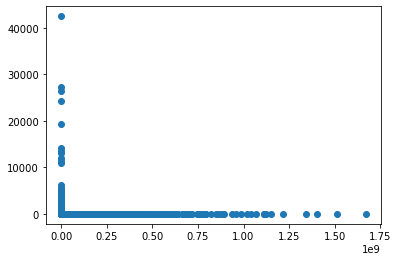

In [43]:
ap_residuals = np.abs(residuals) / y_test

plt.scatter(y_test,ap_residuals)

# De aqui se identifica que para las peliculas pequeñas existe un error bastante alto.
# Sin embargo por la diferencia de escala, se hace necesario normalizar el error por medio de una escala logaritmica.

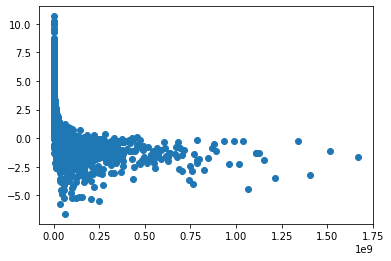

In [44]:
lap_residuals = np.log(ap_residuals)

plt.scatter(y_test,lap_residuals)

#De esto se determina que muchos de los puntos se encuentran cerca a 0% de error, sin embargo hay peliculas con bajo presupuesto que según el modelo
#logran mucho más que lo esperado, sin embargo se puede concluir que se tiene una primera buena aproximación del error.

Finalmente, se realiza una evaluación numerica de los errores por medio de una función acumulativa.

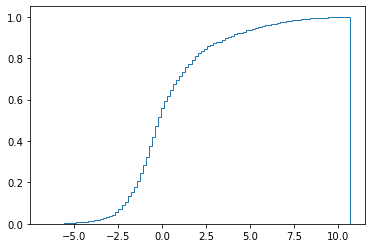

In [48]:
plt.hist(lap_residuals,bins= 100,density= 1, histtype='step',cumulative=True);

De este se concluye que para un valor menor al 100% se tienen aproximadamente el 80% de los datos, y de ahí para abajo el porcentaje es considerable, lo cual no esta mal para un primer modelo.

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

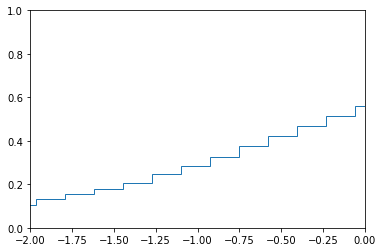

In [49]:
plt.hist(lap_residuals, bins = 100, density= 1, histtype= 'step', cumulative= True);
plt.axis([-2,0, 0, 1])
np.power(np.exp(1)*np.ones(5), np.linspace(-2,0,5))

Adicionalmente al hacer un zoom se encuentra que para errores menores al 100% se tiene un 60% de los datos, por lo cual se determina que existe un margen de mejora. 

**Se debe tener en cuenta que lo anterior esta descrito en una escala logaritmica.**